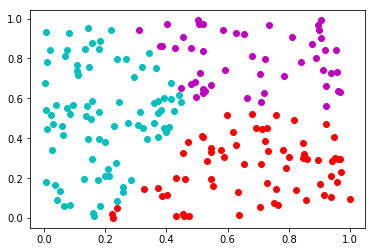

In [50]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

class Kmeans:
    def __init__(self, k, data):
        self.k = k
        self.data = data
        self.centroids = None
        self.clusters = None
        self.generatePointCluster()
        self.initLabel()
        
    def generatePointCluster(self):
        ## Initialize centroid
        self.centroids = np.ndarray((self.k, data.shape[1]))
        self.centroids = self.data[np.random.choice(self.data.shape[0],
                                                   size=self.k,
                                                   replace=False), :]

    def computeDistance(self, a, b):
        return np.sqrt(np.sum((a-b)**2))

    def initLabel(self):
        self.clusters = {i: [] for i in range(self.k)}
    
    def computeCentroid(self):
        centers = np.ndarray(shape=self.centroids.shape)
        
        for k, samples in self.clusters.items():
            temp_mean = []
            temp_sam = np.array(samples)
            
            for i in range(self.data.shape[1]):
                temp_mean.append(sum(temp_sam[:, i]) / temp_sam.shape[0])
            
            centers[k] = np.array(temp_mean)
            
        ## Find nearest centroid
        for i in range(centers.shape[0]):
            
            distances = [self.computeDistance(centers[i], sample) 
                        for sample in self.clusters[i]]
            new_centroid = distances.index(min(distances))
            self.centroids[i] = self.clusters[i][new_centroid]
        
        self.initLabel()
        
    def assignLabel(self):
        ## Assign each of Data to cluster
        for _id, sample in enumerate(self.data):
            distances = []
            
            for c in self.centroids:
                distances.append(self.computeDistance(sample, c))
            
            cluster_num = distances.index(min(distances))
            
            self.clusters[cluster_num].append(sample)
    
    def compute(self):
        
        self.assignLabel()
        ## Compute K means algorithm
        for i in range(100):
            self.computeCentroid()
            self.assignLabel()
            
    
data = np.random.rand(200,2)
# print(data)
k = Kmeans(3, data)
# print(k.data.shape)
k.compute()
k.clusters

plt.figure(2)
x = [i[0] for i in k.clusters[0]]
y = [i[1] for i in k.clusters[0]]
plt.plot(x,y,"ro")

x = [i[0] for i in k.clusters[1]]
y = [i[1] for i in k.clusters[1]]
plt.plot(x,y,"co")

x = [i[0] for i in k.clusters[2]]
y = [i[1] for i in k.clusters[2]]
plt.plot(x,y,"mo")

plt.show()